<a href="https://colab.research.google.com/github/schwallergroup/ai4chem_course/blob/main/notebooks/04%20-%20Unsupervised%20Learning/DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4 tutorial 1 - AI 4 Chemistry

## Table of content

1. Unsupervised learning: dimensionality reduction
2. PCA
3. t-SNE
4. TMAP

# 0. Relevant packages

### Scikit-learn
We will use again the `scikit-learn` package, which contains the `PCA` and `TSNE` methods that we will implement.

### TMAP
`TMAP` is a powerful visualization method capable of representing high-dimensional datasets as a 2D-tree. It can be applied in different domains apart from Chemistry. If you want to know more, you can check the original [paper](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-020-0416-x).

We first install the necessary libraries and get the corresponding dataset

In [1]:
#Install usual data science libraries
!pip install numpy scipy matplotlib scikit-learn pandas rdkit seaborn plotly

#Install tmap
!pip install tmap-viz

#Download ESOL dataset
!mkdir data/
!wget https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/04%20-%20Unsupervised%20Learning/data/esol.csv -O data/esol.csv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 15.5 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement tmap-viz (from versions: none)
ERROR: No matching distribution found for tmap-viz
--2025-08-04 14:57:48--  https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/04%20-%20Unsupervised%20Learning/data/esol.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34453 (34K) [text/plain]
Saving to: ‘data/esol.csv’

data/esol.csv       100%[===================>]  33.65K  --.-KB/s    in 0.01s   

2025-08-04 14:57:48 (3.12 MB/s) - ‘data/esol.csv’ saved [34453/34453]



# 1. - Dimensionality reduction

`Dimensionality reduction` is a fundamental concept in unsupervised learning that aims to reduce the number of features or variables in high-dimensional datasets while preserving the most relevant information. This technique is particularly relevant when dealing with large and complex datasets with a high number of features in common. Besides, it can help scientists to better understand the underlying structure and relationships in their data. Here are some of the most common methods in dimensionality reduction:

    - PCA (Principal Component Analysis)
    - t-SNE (t-distributed Stochastic Neighbor Embedding)
    - NMF (Non-Negative Matrix Factorization)
    - UMAP (Uniform Manifold Approximation and Projection)

By reducing the dimensionality of the data, it is also possible to visualize and interpret the data more easily, and to develop more efficient and accurate predictive models. In this notebook we will explore some dimensionality reduction methods.

# 2. PCA

 [PCA](https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d) (`Principal Component Analysis`) is a popular unsupervised learning technique used for dimensionality reduction. It aims to transform high-dimensional data into a lower-dimensional space while preserving the most important information by identifying the principal components of the data. PCA is widely used in data analysis, visualization, and feature extraction.

### Exercise 1: ESOL dataset dimensionality reduction with PCA

In this exercise, we will apply PCA to the 2048-dimensional fingerprints representing the molecules in the ESOL dataset. We will try to reduce this space to 2 dimensions and plot the resulting space. Normally, before applying PCA you have to standardize your data, but in this case it is not necessary as we use binary features.

In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
import numpy as np

#Load ESOL
esol = pd.read_csv('data/esol.csv')

### YOUR CODE #####

#Create a 'Molecule' column containing rdkit.Mol from each molecule
esol['Molecule'] = esol['smiles'].apply(Chem.MolFromSmiles)

#Create Morgan fingerprints (r=2, nBits=2048) from Molecule column using apply()
####
esol['Fingerprint'] = esol['Molecule'].apply(
    lambda mol: AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
)
esol.head()


[15:01:59] DEPRECATION WARNING: please use MorganGenerator
[15:01:59] DEPRECATION WARNING: please use MorganGenerator
[15:01:59] DEPRECATION WARNING: please use MorganGenerator
[15:01:59] DEPRECATION WARNING: please use MorganGenerator
[15:01:59] DEPRECATION WARNING: please use MorganGenerator
[15:01:59] DEPRECATION WARNING: please use MorganGenerator
[15:01:59] DEPRECATION WARNING: please use MorganGenerator
[15:01:59] DEPRECATION WARNING: please use MorganGenerator
[15:01:59] DEPRECATION WARNING: please use MorganGenerator
[15:01:59] DEPRECATION WARNING: please use MorganGenerator
[15:01:59] DEPRECATION WARNING: please use MorganGenerator
[15:01:59] DEPRECATION WARNING: please use MorganGenerator
[15:01:59] DEPRECATION WARNING: please use MorganGenerator
[15:01:59] DEPRECATION WARNING: please use MorganGenerator
[15:01:59] DEPRECATION WARNING: please use MorganGenerator
[15:01:59] DEPRECATION WARNING: please use MorganGenerator
[15:01:59] DEPRECATION WARNING: please use MorganGenerat

,smiles,log solubility (mol/L),Molecule,Fingerprint
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77,<rdkit.Chem.rdchem.Mol object at 0x7be6704be1f0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Cc1occc1C(=O)Nc2ccccc2,-3.30,<rdkit.Chem.rdchem.Mol object at 0x7be6704be180>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CC(C)=CCCC(C)=CC(=O),-2.06,<rdkit.Chem.rdchem.Mol object at 0x7be6704be260>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87,<rdkit.Chem.rdchem.Mol object at 0x7be6704be2d0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,c1ccsc1,-1.33,<rdkit.Chem.rdchem.Mol object at 0x7be6704be340>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


Now, we apply the `PCA` decomposition. You can check the documentation of the method [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA).

In [7]:
from sklearn.decomposition import PCA

#### YOUR CODE ####

#create PCA object with n=2
pca = PCA(n_components=2)

#Create a numpy array containing the fingerprints
fingerprints_array = np.stack(esol['Fingerprint'].values)

#Apply the fit_transform method to the previous array and store it in coordinates
coordinates = pca.fit_transform(fingerprints_array)

#Add PC1 and PC2 values to each row
esol['PC1'] = coordinates[:, 0]
esol['PC2'] = coordinates[:, 1]
####
esol[['smiles', 'PC1', 'PC2', 'log solubility (mol/L)']].head()

,smiles,PC1,PC2,log solubility (mol/L)
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,0.701650,0.303837,-0.77
1,Cc1occc1C(=O)Nc2ccccc2,1.088615,0.696644,-3.30
2,CC(C)=CCCC(C)=CC(=O),-1.276270,0.166749,-2.06
3,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,1.376449,-0.794417,-7.87
4,c1ccsc1,0.162271,-0.791763,-1.33


Let's plot the data using PC1 and PC2

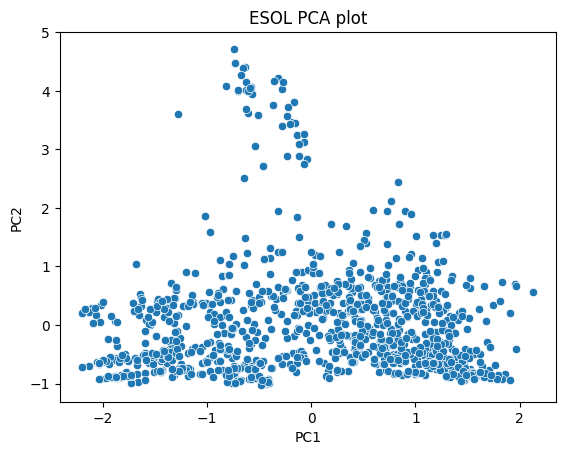

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=esol, x='PC1', y='PC2')

plt.title('ESOL PCA plot');

Finally, we will create a special category of labels to add to this plot. The labels will represent solubility categories. For the sake of simplicity, we will create 3 categories:

    - Low: log solubility lower than -5
    - Medium: log solubility between -5 and -1
    - High: log solubility higher than -1

The only purpose of this classification is adding more information to the plot, so you can explore different interpretations of the reduced space you are representing.

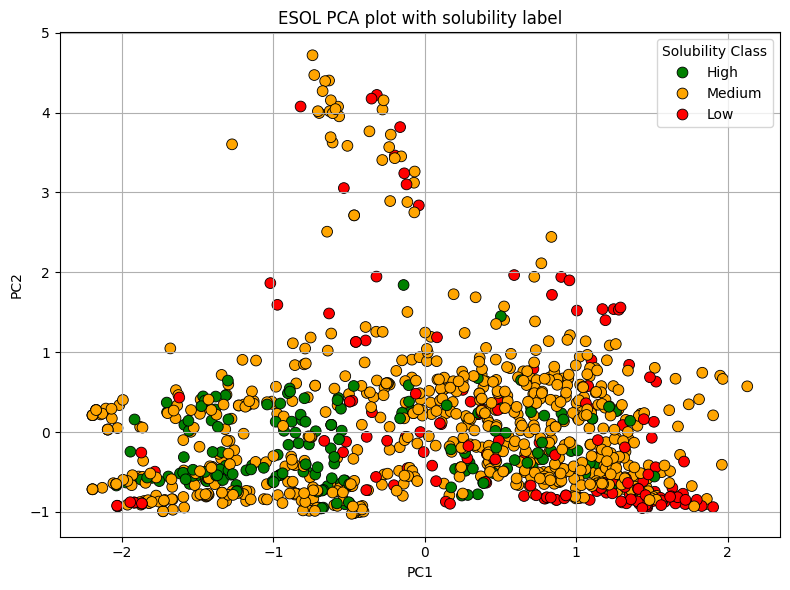

In [9]:
#Create function to add labels
def solubility_class(log_sol):
    '''Return the corresponding label according to solubility value
    '''
    if log_sol < -5:
        return 'Low'

    elif log_sol > -1:
        return 'High'

    else:
        return 'Medium'


### YOUR CODE ####

#Add labels to the ESOL dataset by applying the previous function
esol['SolubilityClass'] = esol['log solubility (mol/L)'].apply(solubility_class)

#Create the PCA plot again including the new labels
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=esol,
    x='PC1',
    y='PC2',
    hue='SolubilityClass',
    palette={'Low': 'red', 'Medium': 'orange', 'High': 'green'},
    s=60,
    edgecolor='black'
)

plt.title('ESOL PCA plot with solubility label')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Solubility Class')
plt.grid(True)
plt.tight_layout()
plt.show()


As you can see, the label categories are quite mixed, and the plot do not clearly show a trend in our data. However, you may keep trying different visualizations (for example, you could add another dimension to the plot by including the PC3 and try to see if a 3D representation gives more information).

# 3. t-SNE

`t-distributed Stochastic Neighbor Embedding` (t-SNE). In contrast to PCA, t-SNE is able to separate nonlinear data, and it can be therefore more powerful to capture local structures and identify clusters of data points with similar features. However, it is computationally more expensive than PCA and it may not be suitable for very large datasets.

### Exercise 2: ESOL dataset dimensionality reduction with t-SNE

In the following example, we will apply t-SNE to the previous dataset and compare the result to PCA decomposition. You can check the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


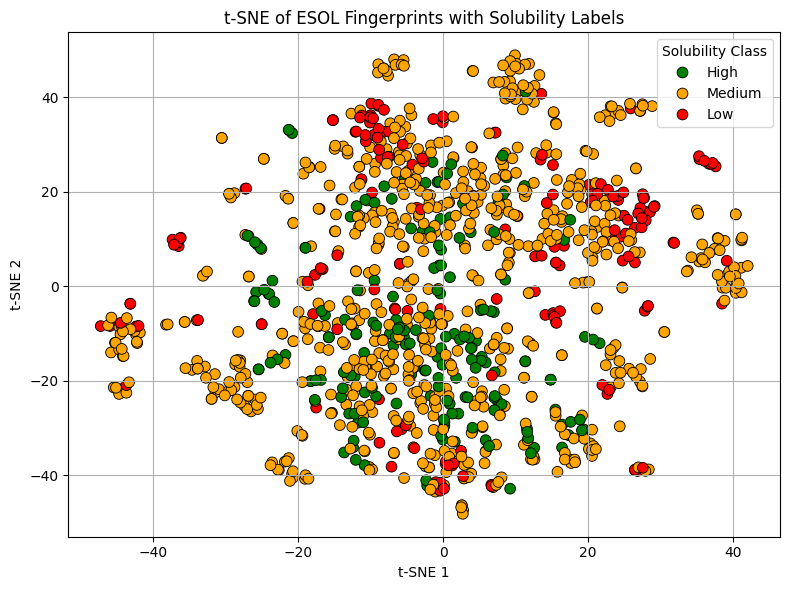

In [11]:
from sklearn.manifold import TSNE

### YOUR CODE ####
# 1. 准备指纹数据
fingerprints_array = np.stack(esol['Fingerprint'].values)

# 2. 使用 t-SNE 降维（2D）
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
tsne_result = tsne.fit_transform(fingerprints_array)

# 3. 把 t-SNE 结果添加到 DataFrame
esol['TSNE-1'] = tsne_result[:, 0]
esol['TSNE-2'] = tsne_result[:, 1]

# 4. 绘图：t-SNE 可视化 + 溶解度标签
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=esol,
    x='TSNE-1',
    y='TSNE-2',
    hue='SolubilityClass',
    palette={'Low': 'red', 'Medium': 'orange', 'High': 'green'},
    s=60,
    edgecolor='black'
)
plt.title('t-SNE of ESOL Fingerprints with Solubility Labels')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Solubility Class')
plt.grid(True)
plt.tight_layout()
plt.show()

Now, plot the results including the solubility label and compare them to the PCA plot. Do you observe differences between the algorithms?

# 4. TMAP

Finally, we will use TMAP for visualizing our solubility dataset. A TMAP plot is constructed in 4 phases:

    1. LSH forest indexing: data are indexed in an LSH forest data structure
    2. kNN Graph Generation: data are clustered using a c-approximate kNN graph
    3. MST Computation: a Minimum Spanning Tree is calculated
    4. Layout generation of the MST

The corresponding representation displays the data as a tree in 2D, showing the relationships between the different points not only through the presence of clusters but also through the branches of the tree.

<div align="left">
<img src="https://github.com/schwallergroup/ai4chem_course/blob/main/notebooks/04%20-%20Unsupervised%20Learning/img/TMAP.png?raw=1" width="400"/>
</div>

Below we show how to create a simple visualization of our data via TMAP.

In [14]:
pip install tmap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.0/495.0 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tmap: filename=tmap-1.2.1-py3-none-any.whl size=546594 sha256=010908d234ab8b65c3c80cbcf83dc5d179f9c25c713fe7c2eda3a66ddcea412f
  Stored in directory: /root/.cache/pip/wheels/19/75/fc/b33c188ea6831aa281431009c78857fc2049cbf1df6daa1a59
  Created wheel for networkx: filename=networkx-2.2-py2.py3-none-any.whl size=1526908 sha256=41cf40ead49d68385dfd95e0a7087cfa9d102adf56db01439b503cef6e633b9b
  Stored in directory: /root/.cache/pip/wheels/92/5c/78/b8bb7def671204ec1b287ea84c9eef72a53d92ec6a1f1d95c1
Successfully built tmap networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 3.5
    Uninstalling networkx-3.5:
      Successfully uninstalled networkx-3.5
ERROR: pip's dependency resolver does not currently 

In [18]:
import tmap as tm

#get fingerprints of molecules
fps = esol['Fingerprint'].values

#Transform fingerprints into tmap vectors


#Create MinHash encoder and LSH Forest
enc = tm.Minhash(512)
vec_fps = enc.batch_from_rdkit(esol['Fingerprint'].values)
lf = tm.LSHForest(512, 128)

#add vec_fp to minhash encoder and then pass it to the LSH forest
lf.batch_add(enc.batch_from_binary_array(vec_fp))
lf.index()

# Configuration for the tmap layout
CFG = tm.LayoutConfiguration()
CFG.node_size = 1 / 50

#Compute graph
x, y, s, t, _ = tm.layout_from_lsh_forest(lf, CFG)

AttributeError: module 'tmap' has no attribute 'Minhash'

Once you have computed the graph, you can plot it. In our case, we use matplotlib.

NameError: name 's' is not defined

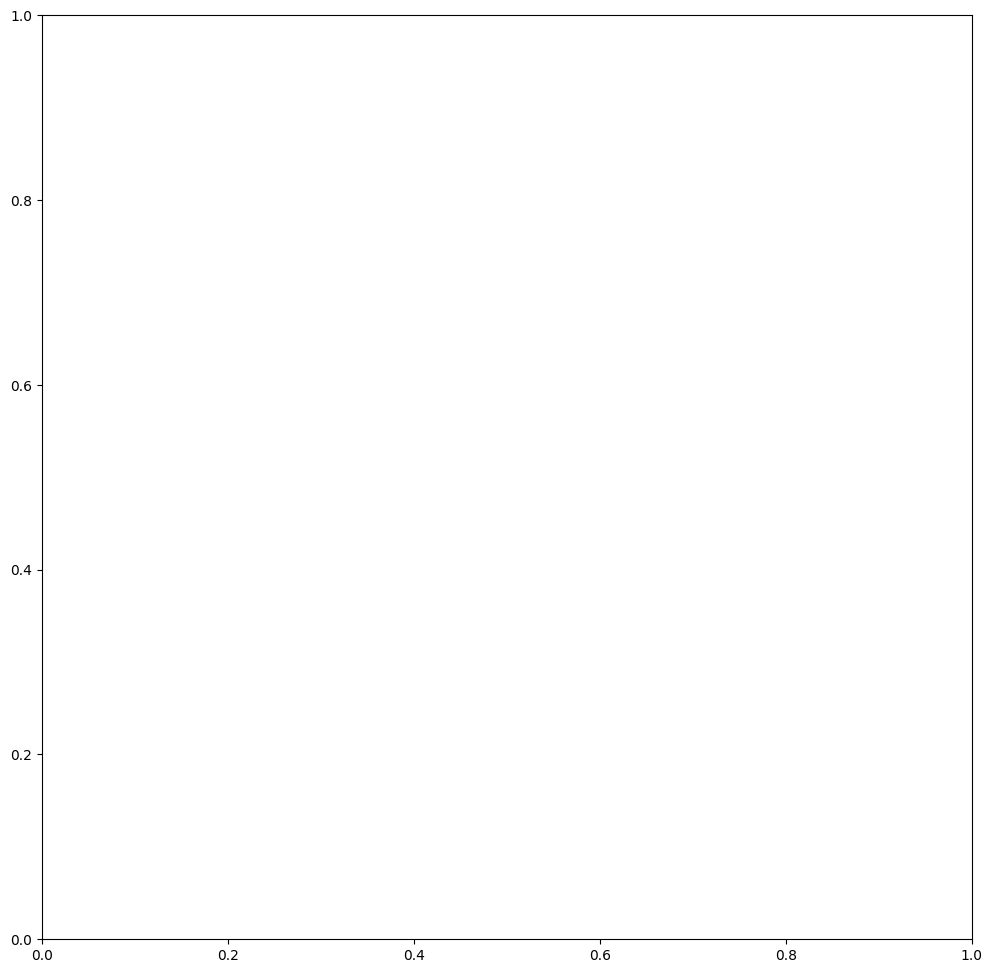

In [19]:
#Create figure
fig, ax = plt.subplots(figsize=(12,12))

#Create a class to convert solubility class to integers
def solubility_class_to_int(log_sol):
    '''Return the corresponding label according to solubility value
    '''
    if log_sol < -5:
        return 0

    elif log_sol > -1:
        return 1

    else:
        return 2

#apply previous function (we create an array that will be used in the plotting function)
esol['int_class'] = esol['log solubility (mol/L)'].apply(solubility_class_to_int)


#Plot edges
for i in range(len(s)):
        plt.plot(
            [x[s[i]], x[t[i]]],
            [y[s[i]], y[t[i]]],
            "k-",
            linewidth=0.5,
            alpha=0.5,
            zorder=1,
        )

#Plot the vertices
scatter = ax.scatter(x, y, c=esol['int_class'].values, cmap='Set1', s=2, zorder=2)
plt.tight_layout()
classes = ['High', 'Medium', 'Low']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('ESOL TMAP visualization')
plt.plot()

Alternatively, you can use other libraries like [plotly](https://plotly.com/python-api-reference/index.html) or [Faerun](https://github.com/reymond-group/faerun) to plot the data in a more interactive mode.

In [20]:
#example using plotly
import plotly.express as px

fig = px.scatter(x=x, y=y, color=esol['sol_class'].values,
                  hover_name=esol['smiles'].values, color_continuous_scale=['#FF0000','#4169E1','#2E8B57'], title='ESOL TMAP')

fig.show()

NameError: name 'x' is not defined

We recommend you to check the original [repo](https://github.com/reymond-group/tmap) to observe the different possibilities of applying TMAP. Cheers to [Daniel Probst](https://github.com/daenuprobst) for creating this great tool!